# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [6]:
#1
"""
Your code here
"""
print('max CNT_CHILDREN : '+str(app_train['CNT_CHILDREN'].max()))
cut_rule = [0,1,2,3,5,20] 

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True) #include_lowest:是否包含左端点
app_train['CNT_CHILDREN_GROUP'].value_counts()

max CNT_CHILDREN : 19


(-0.001, 1.0]    276490
(1.0, 2.0]        26749
(2.0, 3.0]         3717
(3.0, 5.0]          513
(5.0, 20.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [7]:
app_train['CNT_CHILDREN_GROUP']

0         (-0.001, 1.0]
1         (-0.001, 1.0]
2         (-0.001, 1.0]
3         (-0.001, 1.0]
4         (-0.001, 1.0]
5         (-0.001, 1.0]
6         (-0.001, 1.0]
7         (-0.001, 1.0]
8         (-0.001, 1.0]
9         (-0.001, 1.0]
10        (-0.001, 1.0]
11        (-0.001, 1.0]
12        (-0.001, 1.0]
13        (-0.001, 1.0]
14        (-0.001, 1.0]
15        (-0.001, 1.0]
16        (-0.001, 1.0]
17        (-0.001, 1.0]
18        (-0.001, 1.0]
19        (-0.001, 1.0]
20        (-0.001, 1.0]
21        (-0.001, 1.0]
22        (-0.001, 1.0]
23        (-0.001, 1.0]
24           (1.0, 2.0]
25        (-0.001, 1.0]
26        (-0.001, 1.0]
27        (-0.001, 1.0]
28        (-0.001, 1.0]
29        (-0.001, 1.0]
              ...      
307481    (-0.001, 1.0]
307482    (-0.001, 1.0]
307483    (-0.001, 1.0]
307484    (-0.001, 1.0]
307485    (-0.001, 1.0]
307486    (-0.001, 1.0]
307487    (-0.001, 1.0]
307488    (-0.001, 1.0]
307489    (-0.001, 1.0]
307490    (-0.001, 1.0]
307491       (1.

In [17]:
#2-1
"""
Your code here
"""
grp = app_train['CNT_CHILDREN_GROUP']

grouped_df_CHILDREN = app_train.groupby(grp)['AMT_INCOME_TOTAL']
print(grouped_df_CHILDREN.mean())


print('------------------------------')

grp = app_train['TARGET']

grouped_df_TARGET = app_train.groupby(grp)['AMT_INCOME_TOTAL']
print(grouped_df_TARGET.mean())

CNT_CHILDREN_GROUP
(-0.001, 1.0]    168361.253573
(1.0, 2.0]       172580.748737
(2.0, 3.0]       173948.262712
(3.0, 5.0]       171293.508772
(5.0, 20.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64
------------------------------
TARGET
0    169077.722266
1    165611.760906
Name: AMT_INCOME_TOTAL, dtype: float64


In [23]:
grouped_df_TARGET.describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,282686.0,169077.722266,110476.268524,25650.0,112500.0,148500.0,202500.0,18000090.0
1,24825.0,165611.760906,746676.959440,25650.0,112500.0,135000.0,202500.0,117000000.0


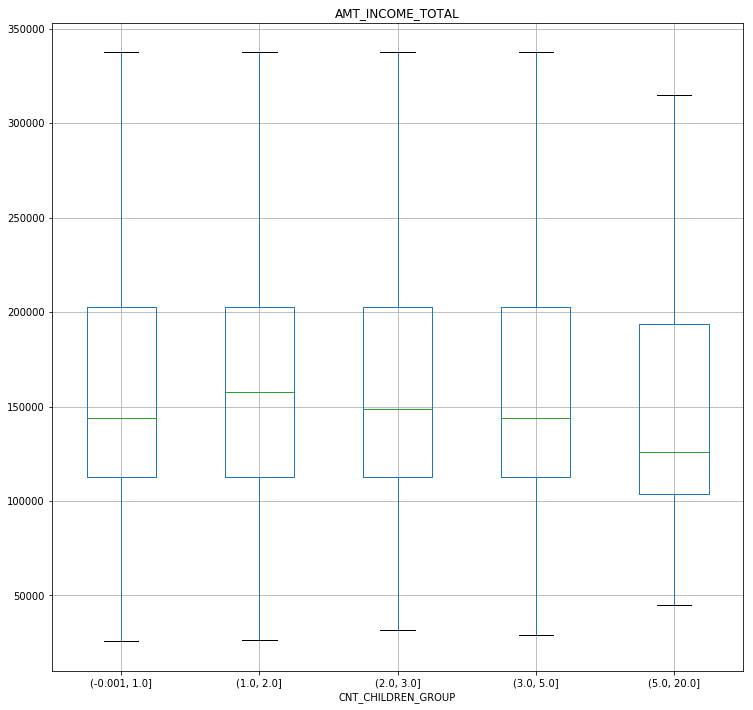

-------------------------------


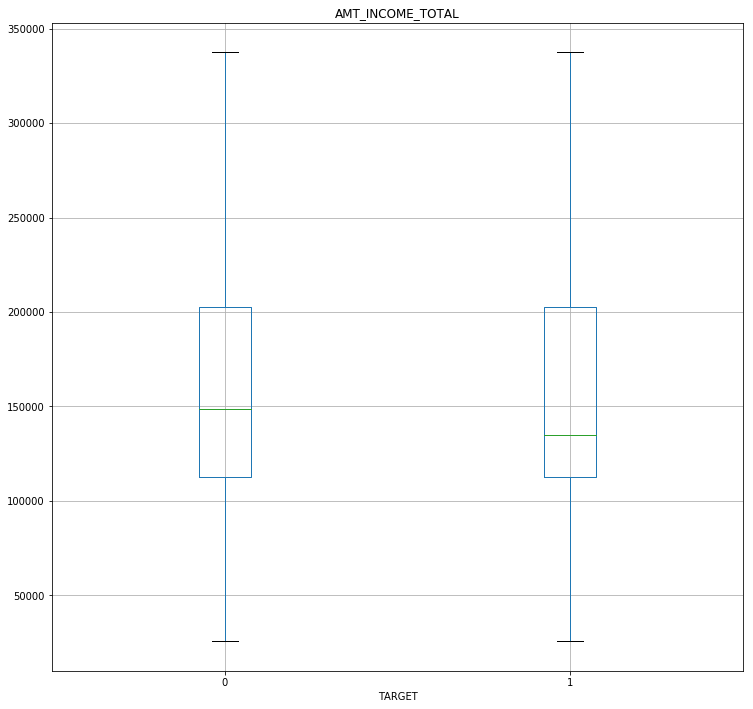

In [26]:
#2-2
"""
Your code here
"""

plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()



print('-------------------------------')

plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'TARGET'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()



In [27]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:( x - np.mean(x) ) / ( np.std(x) ) )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.049404
1,270000.0,0.913522
2,67500.0,-0.919454
3,135000.0,-0.308462
4,121500.0,-0.430661


In [29]:
app_train.groupby(['TARGET','CNT_CHILDREN_GROUP'])['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'].describe()

count      mean       std       min       25%  \
TARGET CNT_CHILDREN_GROUP                                                     
0      (-0.001, 1.0]       254427.0 -0.004737  0.954385 -1.298270 -0.512126   
       (1.0, 2.0]           24416.0  0.041282  1.385894 -1.290123 -0.512126   
       (2.0, 3.0]            3359.0  0.055248  1.034009 -1.245317 -0.512126   
       (3.0, 5.0]             451.0  0.045494  0.923297 -1.265683 -0.512126   
       (5.0, 20.0]             33.0 -0.270815  0.643803 -1.123119 -0.715790   
1      (-0.001, 1.0]        22063.0  0.000699  1.059872 -0.187450 -0.071132   
       (1.0, 2.0]            2333.0 -0.005490  0.117766 -0.184437 -0.071132   
       (2.0, 3.0]             358.0 -0.004330  0.151078 -0.173588 -0.075803   
       (3.0, 5.0]              62.0 -0.019768  0.153701 -0.173588 -0.101266   
       (5.0, 20.0]              9.0  0.019270  0.098801 -0.101266 -0.040998   

                                50%       75%         max  
TARGET CNT_CHILDREN_GROUP                                  
0      (-0.001, 1.0]      -0.186264  0.302530  120.667959  
       (1.0, 2.0]         -0.104798  0.302530  161.401576  
       (2.0, 3.0]         -0.104798  0.302530   18.835954  
       (3.0, 5.0]         -0.104798  0.363629    5.394130  
       (5.0, 20.0]        -0.512126  0.098866    1.524514  
1      (-0.001, 1.0]      -0.040998  0.049404  156.475622  
       (1.0, 2.0]         -0.040998  0.049404    1.586244  
       (2.0, 3.0]         -0.040998  0.037351    1.586244  
       (3.0, 5.0]         -0.047025  0.004203    0.863025  
       (5.0, 20.0]         0.019270  0.049404    0.200075